In [1]:
import pandas as pd
train_data = pd.read_csv("trained.csv")
test_data = pd.read_csv("tested.csv")

In [2]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [3]:
y_train = train_data["Survived"]
X_train = train_data.drop("Survived",axis=1)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("std_scaler",MinMaxScaler()),
    ])


num_pipeline.fit_transform(X_train)

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429],
       [0.03259623],
       [0.05182215],
       [0.01571255],
       [0.06104473],
       [0.01533038],
       [0.03122992],
       [0.05684821],
       [0.02537431],
       [0.03513366],
       [0.01410226],
       [0.05074862],
       [0.02537431],
       [0.01567195],
       [0.06929139],
       [0.04113566],
       [0.06126432],
       [0.01410226],
       [0.51334181],
       [0.01537917],
       [0.01541158],
       [0.0541074 ],
       [0.28598956],
       [0.01512699],
       [0.02049464],
       [0.16038672],
       [0.10149724],
       [0.01411046],
       [0.01571255],
       [0.03513366],
       [0.02194234],
       [0.01849397],
       [0.04098927],
       [0.01541158],
       [0.08115719],
       [0.01537917],
       [0.01571255],
       [0.03025399],
       [0.015

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A1160E358>,
      dtype=object)

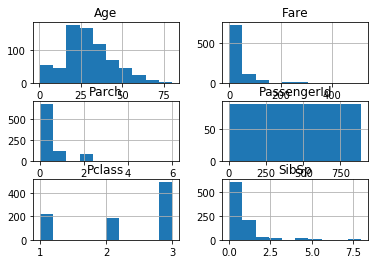

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X_train.hist()

In [6]:
combine = [train_data, test_data]

for dataset in combine:
    dataset["AgeBucket"] = dataset["Age"] // 15 * 15
    dataset["AgeBucket"] = dataset["Age"] // 15 * 15
for dataset in combine:
    dataset["RelativesOnboard"] = dataset["SibSp"] + dataset["Parch"]
    dataset["IsAlone"] = 1
    dataset["IsAlone"].loc[dataset["RelativesOnboard"]>0] = 0
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
y_train = train_data["Survived"]
X_train = train_data.drop("Survived",axis=1)
X_train.head()

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked", "AgeBucket", "IsAlone","Title"])),
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])
cat_pipeline.fit_transform(X_train)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [8]:
preprocess_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, ["Fare"]),
        ("cat_pipeline", cat_pipeline, ["Pclass", "Sex", "Embarked", "AgeBucket", "IsAlone", "Title"]),
    ])

In [9]:
X_train = preprocess_pipeline.fit_transform(X_train)
X_train.shape

(891, 22)

In [10]:


from sklearn.svm import SVC

svm_clf = SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm_clf.fit(X_train, y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:

X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)


from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8272125751901033

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-pa

0.8070241743275451

Text(0, 0.5, '정확도')

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180

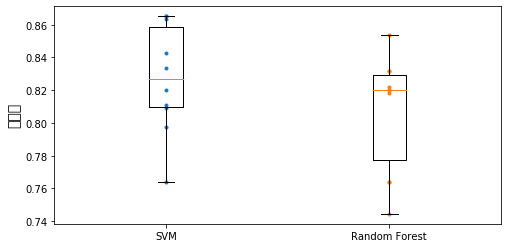

In [13]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("정확도", fontsize=14)


In [14]:
drop_column = ['Age', 'PassengerId','Cabin', 'Ticket', 'Parch', 'SibSp','RelativesOnboard']
for dataset in combine:    
    dataset.drop(drop_column, axis=1, inplace = True)
train_data.head()

,Survived,Pclass,Name,Sex,Fare,Embarked,AgeBucket,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,7.2500,S,15.0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C,30.0,0,3
2,1,3,"Heikkinen, Miss. Laina",female,7.9250,S,15.0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,S,30.0,0,3
4,0,3,"Allen, Mr. William Henry",male,8.0500,S,30.0,1,1


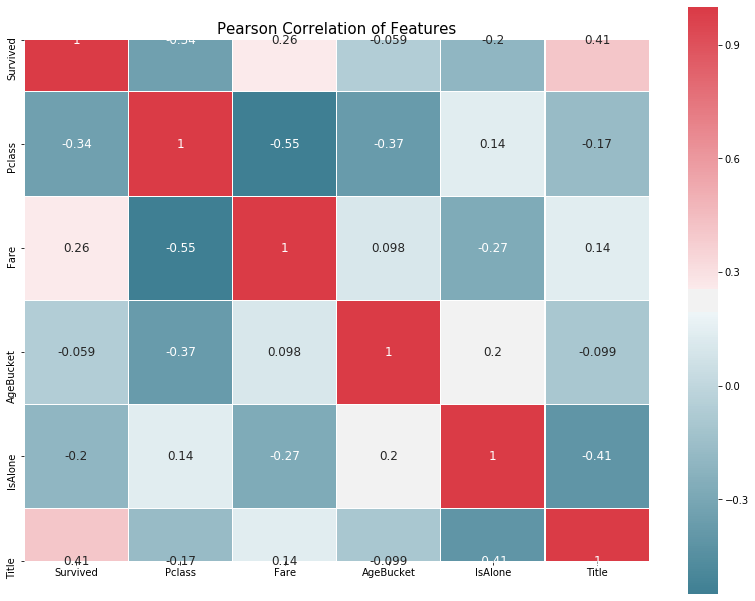

In [15]:
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbk_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gbk_scores = cross_val_score(gbk_clf, X_train, y_train, cv=10)
gbk_scores.mean()


0.8070621949835433

In [17]:
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
random_forest.score(X_train,y_train)

0.9450056116722784

In [18]:
ran_scores = cross_val_score(random_forest,X_train,y_train,cv=10)
ran_scores.mean()

0.7991967427079787

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(svm_clf,param_grid = param_grid, cv=5, 
                        scoring="accuracy", n_jobs= 4, verbose = 1)
modelsvm.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 115 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  5.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [25]:
final_model = modelsvm.best_estimator_
final_score = cross_val_score(final_model, X_train, y_train, cv=10)
final_score.mean()

0.8272125751901033

In [26]:
y_pred = final_model.predict(X_test)

In [27]:
df= pd.DataFrame(y_pred)
df.to_csv("./result.csv")